write an algorithm to determine is "happy"

a number is happy if the **sum of the square of the digits** ever equals one

An example of a happy number is 19: 

1^2 + 9^2 = 82 8^2 + 2^2 = 68 6^2 + 8^2 = 100 1^2 + 0^2 + 0^2 = 1 

If it is not happy then it will eventually hit repeat back to a number that it already saw

In [1]:
from collections import Counter
from functools import lru_cache

import networkx as nx
import pylab as plt

In [2]:
ops = Counter()

@lru_cache
def squared(s):
    ops['squared'] += 1
    return int(s)**2

def squared_digit_sum(n):
    ops['squared_digit_sum'] += 1
    return sum((1 if d=='1' else squared(d)) for d in str(n))


def generate_squared_digit_sum(n):
    while True:
        yield (n:= squared_digit_sum(n))
        
def squared_digit_sum_target_full(n, network):    
    if n in network:
        return network
    
    prev = n

    for i, total in enumerate(generate_squared_digit_sum(n), 1):
        if i > 20:
            raise RuntimeError
        
        network[prev] = total
        if total in network:
            return network
        
        prev = total


@lru_cache
def canonical_name(n):
    ops['canonical_name'] += 1
    return ''.join(sorted(str(n))).replace('0', '')

def generate_squared_digit_sum_canonical(n):
    while True:
        yield (n:= canonical_name(squared_digit_sum(n)))
        
def squared_digit_sum_target_canonical(n, network):
    canonical = canonical_name(n)
    
    if canonical in network:
        return network
    
    prev = canonical

    for i, total in enumerate(generate_squared_digit_sum_canonical(n), 1):
        if i > 20:
            raise RuntimeError
        
        network[prev] = total
        if total in network:
            return network
        
        prev = total
        
        
def get_network(target_function):
    start = 1
    stop = 150
    network = {}
    for n in range(start, stop):
        network = target_function(n, network)

    print('Operation counts:')
    print(ops)
    print()
    ops.clear()

    print(f'Sub graphs sizes, with input from {start} to {stop}:')
    graph = nx.DiGraph(iter(network.items()))
    sub_graphs = nx.connected_components(graph.to_undirected())
    for sub in sub_graphs:
        print(len(sub))
    
    return network

print('Full Network')
full_network = get_network(squared_digit_sum_target_full)
print()
print('Canonical Network')
canonical_network = get_network(squared_digit_sum_target_canonical)

Full Network
Operation counts:
Counter({'squared_digit_sum': 150, 'squared': 9})

Sub graphs sizes, with input from 1 to 150:
26
124

Canonical Network
Operation counts:
Counter({'canonical_name': 151, 'squared_digit_sum': 84})

Sub graphs sizes, with input from 1 to 150:
13
71


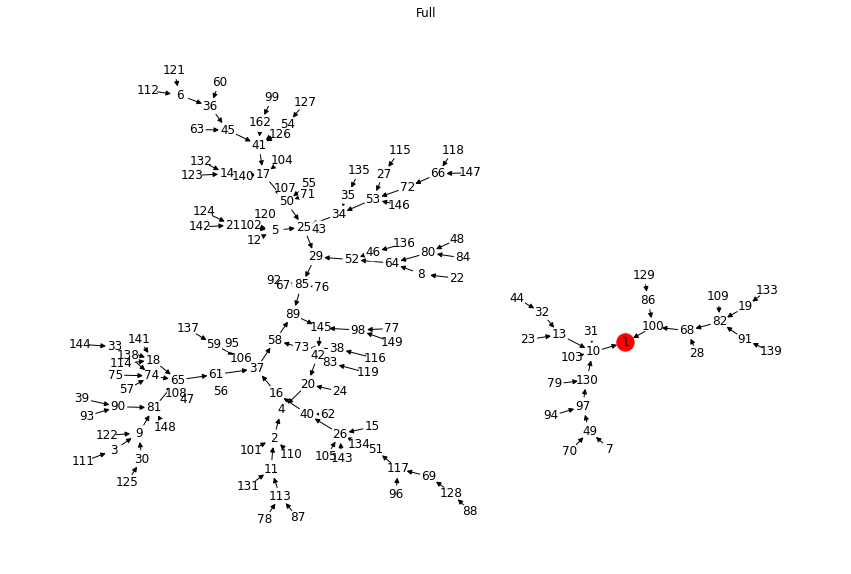

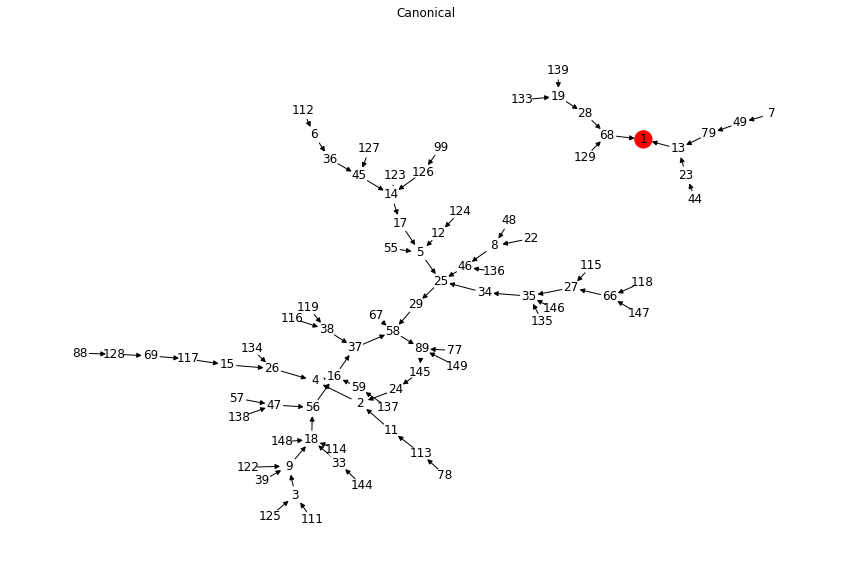

In [4]:
def colour(el):
    return 'red' if str(el) == '1' else 'white'

def display_network(network, title):
    plt.figure(figsize=(15, 10))
    plt.title(title)
    
    graph = nx.DiGraph(iter(network.items()))

    nx.draw(
        graph, 
        with_labels=True, 
        node_color=list(map(colour, network)), 
        pos=nx.nx_agraph.graphviz_layout(graph),
    )

    
for title, network in [('Full', full_network), ('Canonical', canonical_network)]:
    display_network(network, title)